# House Prices: Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting.

My goal for this project is to minimize the Root Mean Square Error as much as possible. Ideally, I would like my RSME to be 0.00044 (that is the lowest one, currently) or lower.

## Step 1: Frame the Problem

__Business Objective:__ Using various explanatory features, build a predictive model that will be able to accurately predict the final price of a given home.

The residential homes are located in Ames, Iowa. 

We are given 79 explanatory features.

__Type of Task:__ This is a classic Regression problem.

__Performance Measure:__ We will use the Root Mean Square Error (RSME). This performance measure is most commonly used for Regression tasks. Furthermore, it is the performance measure that we are looking to minimize. We will also be taking a look at accuracy.

## Step 2: Retrieving the Data

You may retrieve the data from the [competition website](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description).

__Data Breakdown:__
- data_description.txt: description/information about the data
- sample_submission.csv: what a submission should look like
- test.csv: testing set
- train.csv: training set

In [1]:
# Importing the Basic ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
# Retrieving the Data
PATH_NAME= '/Users/jinalshah/Jinal/Github Repos/House-Prices-Challenge-Solution/Data'
raw_train = pd.read_csv(PATH_NAME+'/train.csv')
raw_test = pd.read_csv(PATH_NAME+'/test.csv')
sample_submission = pd.read_csv(PATH_NAME+'/sample_submission.csv')

In [3]:
# Previewing the training data
raw_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are clearly a lot of features! There are 79 total features (not including Id and SalePrice). I don't think all features are necessary, and it will be up to us to determine which features are necessary and which are not.

In [4]:
# Previewing the testing data
raw_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Previewing the Submission Set
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


We need to make sure we include the Id and the Predicted Sale Price in our submission.

## Step 3: Exploratory Data Analysis (EDA)

### Feature Descriptions
Since there are 79 features, I won't explain each one in depth. However, the competition site and the data_description.txt file explain each feature in depth.

Also, for categorical features, we won't be able to go through them all because there may be a lot. So to combat this, we will use the [Tableau Visualization Tool](https://public.tableau.com/s/) and note our insights down here. 

First, lets take a look at the size of our training set.

In [15]:
print('Number of Features: ',raw_train.shape[1]-2)
print('Number of Training Examples: ',raw_train.shape[0])

Number of Features:  79
Number of Training Examples:  1460


In [23]:
# Getting a feel for the types of data I have
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Missing Values

In [21]:
# Creating a dictionary to get the features with missing values
missing_vals = {}

for key in raw_train.columns:
    if raw_train[key].isna().sum() > 0:
        missing_vals[key] = round(raw_train[key].isna().sum()/raw_train.shape[0] * 100,2)

missing_vals

{'LotFrontage': 17.74,
 'Alley': 93.77,
 'MasVnrType': 0.55,
 'MasVnrArea': 0.55,
 'BsmtQual': 2.53,
 'BsmtCond': 2.53,
 'BsmtExposure': 2.6,
 'BsmtFinType1': 2.53,
 'BsmtFinType2': 2.6,
 'Electrical': 0.07,
 'FireplaceQu': 47.26,
 'GarageType': 5.55,
 'GarageYrBlt': 5.55,
 'GarageFinish': 5.55,
 'GarageQual': 5.55,
 'GarageCond': 5.55,
 'PoolQC': 99.52,
 'Fence': 80.75,
 'MiscFeature': 96.3}

We will come back to see how to deal with these missing values after we explore the numerical and categorical features. Alley, FireplaceQu, PoolQC, Fence, and MiscFeatures have most of their values missing. It might be best to remove these features, but we will have to see how they relate to SalePrice target value.

### Numerical Features

Lets take a look at our Numerical Features!

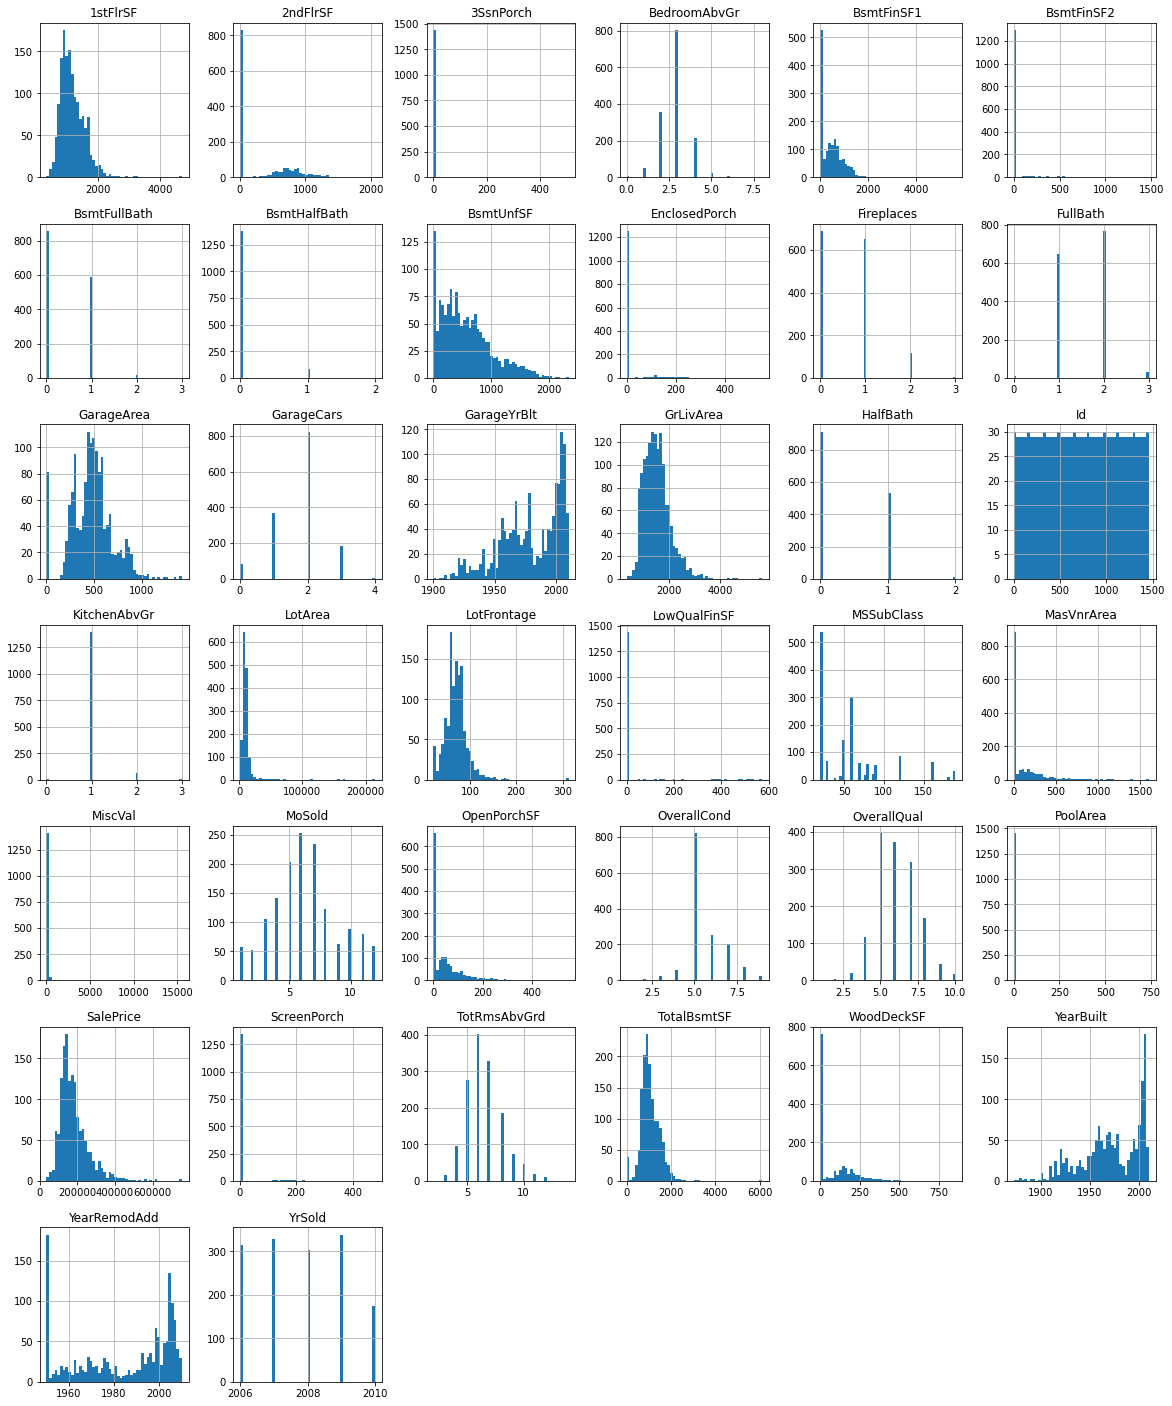

In [31]:
# Plotting Histograms
raw_train.hist(bins=50,figsize=(20,25))
plt.show()

There is a lot of interesting things here. We will go indepth with the numerical histograms later on. The SalePrice histogram is right-skewed. Most of the true numerical features have the same pattern. According to [this Medium Article](https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0) & [this book](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/), we will have to transform these skewed features and the skewed target variable so that our regression model can accurately give predictions.

We can transform the skewness using the Logarithmic Function as suggested in the Medium Article and the Book (both links in the above cell).

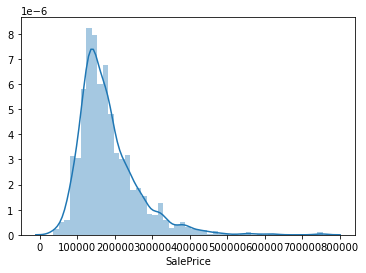

In [37]:
# Sale Prices Histogram
seaborn.distplot(raw_train['SalePrice'])

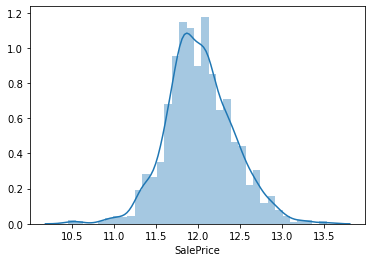

In [38]:
# Using the Log Function on Sale Price
seaborn.distplot(np.log(raw_train['SalePrice']))

Comparing both the distributions for the SalePrice, we can see that after applying Log, our distribution is normal like we would want it to be. Therefore, we will apply the log function to turn our distributions to normal

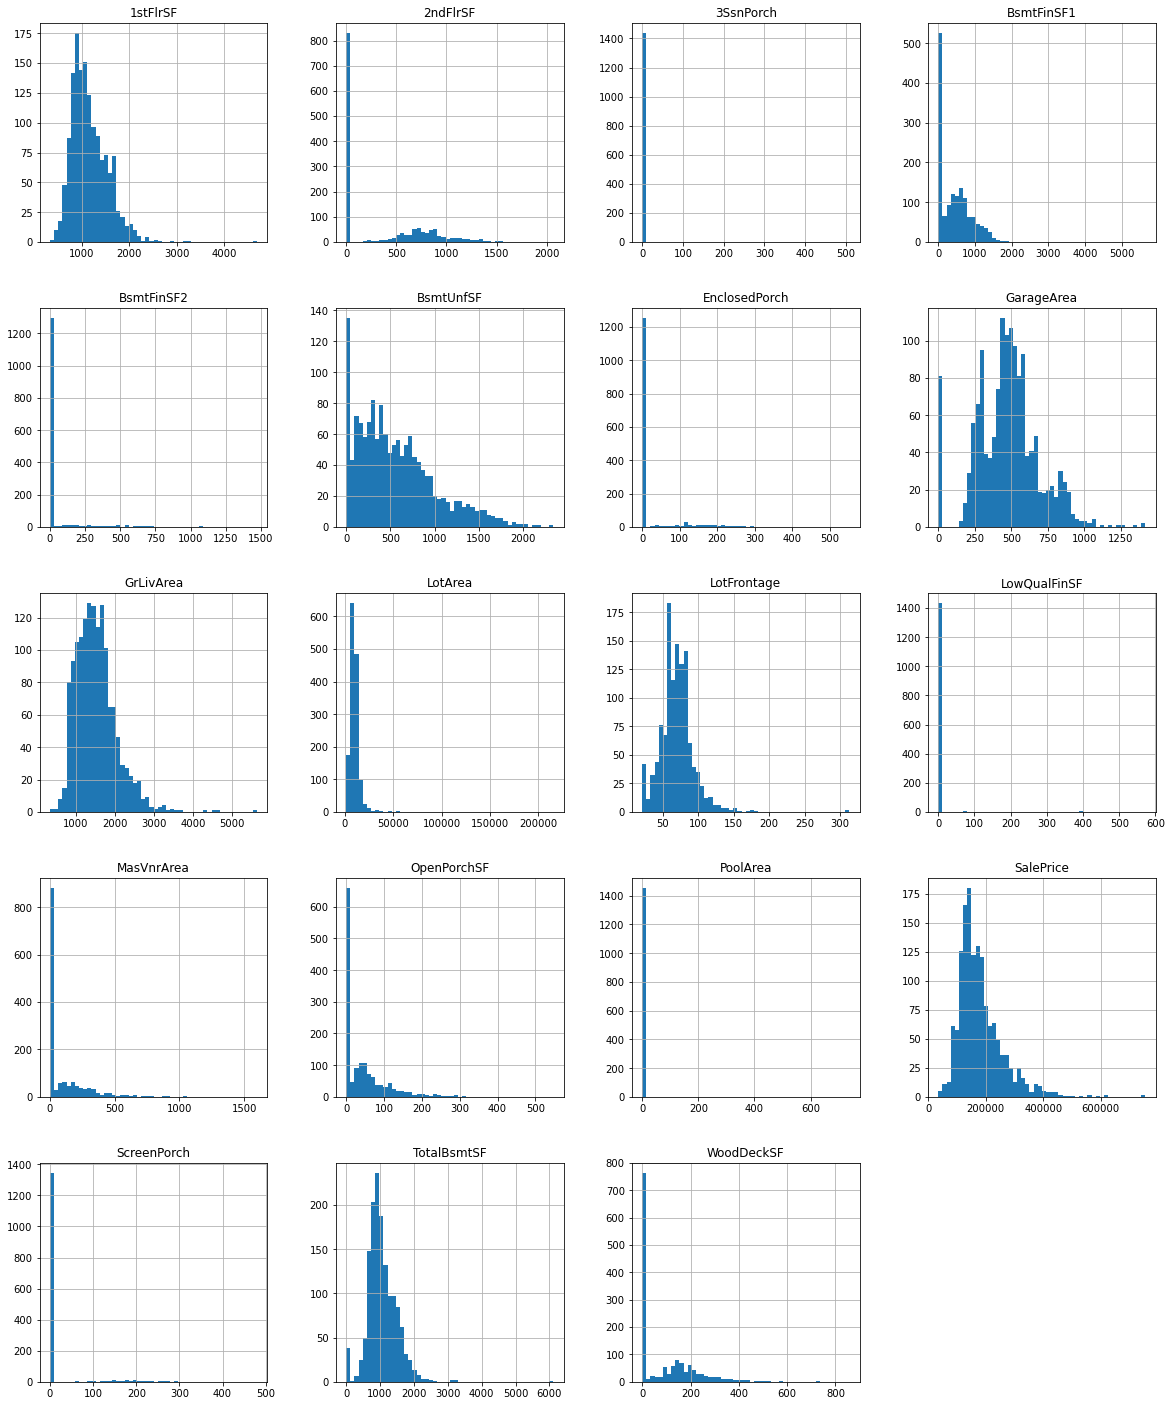

In [42]:
# Distributions of our true numerical features
true_num = ['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
           'EnclosedPorch','GarageArea','PoolArea','GrLivArea','LotArea',
           'LotFrontage','LowQualFinSF','MasVnrArea','OpenPorchSF','TotalBsmtSF',
           'WoodDeckSF','3SsnPorch','ScreenPorch','SalePrice']
raw_train[true_num].hist(bins=50,figsize=(20,25))
plt.show()

In [43]:
# Looking at the statistics for the true numeric features
raw_train[true_num].describe()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,GarageArea,PoolArea,GrLivArea,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,OpenPorchSF,TotalBsmtSF,WoodDeckSF,3SsnPorch,ScreenPorch,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,443.639726,46.549315,567.240411,21.954110,472.980137,2.758904,1515.463699,10516.828082,70.049958,5.844521,103.685262,46.660274,1057.429452,94.244521,3.409589,15.060959,180921.195890
std,386.587738,436.528436,456.098091,161.319273,441.866955,61.119149,213.804841,40.177307,525.480383,9981.264932,24.284752,48.623081,181.066207,66.256028,438.705324,125.338794,29.317331,55.757415,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,882.000000,0.000000,0.000000,0.000000,223.000000,0.000000,334.500000,0.000000,1129.500000,7553.500000,59.000000,0.000000,0.000000,0.000000,795.750000,0.000000,0.000000,0.000000,129975.000000
50%,1087.000000,0.000000,383.500000,0.000000,477.500000,0.000000,480.000000,0.000000,1464.000000,9478.500000,69.000000,0.000000,0.000000,25.000000,991.500000,0.000000,0.000000,0.000000,163000.000000
75%,1391.250000,728.000000,712.250000,0.000000,808.000000,0.000000,576.000000,0.000000,1776.750000,11601.500000,80.000000,0.000000,166.000000,68.000000,1298.250000,168.000000,0.000000,0.000000,214000.000000
max,4692.000000,2065.000000,5644.000000,1474.000000,2336.000000,552.000000,1418.000000,738.000000,5642.000000,215245.000000,313.000000,572.000000,1600.000000,547.000000,6110.000000,857.000000,508.000000,480.000000,755000.000000


We can see that from the stats, Feature Scaling is needed!

From the distributions, we can see that mostly all the numerical features have a cap of 0. Furthermore, 3SsnPorch, BsmtFinSF2, EnclosedPorch, LowQualFinSF, PoolArea, ScreenPorch, MasVnrArea, and WoodDeckSF are mostly made up of 0s. I may look to remove these features given that they don't correlate much with SalePrice.

Also, the histograms reinforce that the numerical features are all right-skewed.

In [45]:
# Correlation Matrix
raw_train[true_num].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotArea          0.263843
BsmtUnfSF        0.214479
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64